In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as mpl
from wordcloud import WordCloud

In [127]:
df1=pd.read_csv("IMDb Movies India.csv",encoding='latin1')
df1.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [128]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [129]:
df1=df1.dropna()
df1.shape

(5659, 10)

In [130]:
df1.dropna(inplace=True)
df1.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [131]:
df1.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [132]:
df1['Duration'] = df1['Duration'].astype(str)
df1['Duration'] = df1['Duration'].str.extract('(\d+)')
df1['Duration'] = pd.to_numeric(df1['Duration'], errors='coerce')

In [133]:
df1['Year'] = df1['Year'].astype(str)
df1['Year'] = df1['Year'].str.extract('(\d+)')
df1['Year'] = pd.to_numeric(df1['Year'], errors='coerce')

In [134]:
df1["Year"].head()

1    2019
3    2019
5    1997
6    2005
8    2012
Name: Year, dtype: int64

In [135]:
genres=df1['Genre'].str.split(',',expand=True)
genres.head(5)

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller


In [136]:
genresPie = df1['Genre'].value_counts()
genresPie.head(5)

Drama                   844
Drama, Romance          332
Action, Crime, Drama    329
Action, Drama           206
Comedy, Drama           205
Name: Genre, dtype: int64

In [137]:
genrePie = pd.DataFrame(list(genresPie.items()))
genrePie = genrePie.rename(columns={0: 'Genre', 1: 'Count'})
genrePie.head(5)

,Genre,Count
0,Drama,844
1,"Drama, Romance",332
2,"Action, Crime, Drama",329
3,"Action, Drama",206
4,"Comedy, Drama",205


In [138]:
df1['Votes'] = df1['Votes'].str.replace(',', '').astype(int)
df1["Votes"].head(5)

1       8
3      35
5     827
6    1086
8     326
Name: Votes, dtype: int32

In [139]:
directors = df1["Director"].value_counts()
directors.head(5)

David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
Name: Director, dtype: int64

In [140]:
Q1 = df1['Duration'].quantile(0.25)
Q3 = df1['Duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df1 = df1[(df1['Duration'] >= lower_bound) & (df1['Duration'] <= upper_bound)]
df1.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [141]:
Q1 = df1['Rating'].quantile(0.25)
Q3 = df1['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df1 = df1[(df1['Rating'] >= lower_bound) & (df1['Rating'] <= upper_bound)]
df1.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [142]:
df1["Actor"] = df1['Actor 1'] + ', ' + df1['Actor 2'] + ', ' + df1['Actor 3']
df1["Directors"] = df1['Director'].astype('category').cat.codes
df1["Genres"] = df1['Genre'].astype('category').cat.codes
df1["Actors"] = df1['Actor'].astype('category').cat.codes
df1.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",610,224,3788
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1305,182,3263
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1493,155,1091
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",1994,283,2036
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",133,314,5437


In [143]:
Q1 = df1['Genres'].quantile(0.25)
Q3 = df1['Genres'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df1 = df1[(df1['Genres'] >= lower_bound) & (df1['Genres'] <= upper_bound)]
df1.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",610,224,3788
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1305,182,3263
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1493,155,1091
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",1994,283,2036
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",133,314,5437


In [144]:
Q1 = df1['Directors'].quantile(0.25)
Q3 = df1['Directors'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df1 = df1[(df1['Directors'] >= lower_bound) & (df1['Directors'] <= upper_bound)]
df1.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",610,224,3788
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1305,182,3263
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1493,155,1091
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",1994,283,2036
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",133,314,5437


In [145]:
Q1 = df1['Actors'].quantile(0.25)
Q3 = df1['Actors'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df1 = df1[(df1['Actors'] >= lower_bound) & (df1['Actors'] <= upper_bound)]
df1.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",610,224,3788
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1305,182,3263
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1493,155,1091
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",1994,283,2036
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",133,314,5437


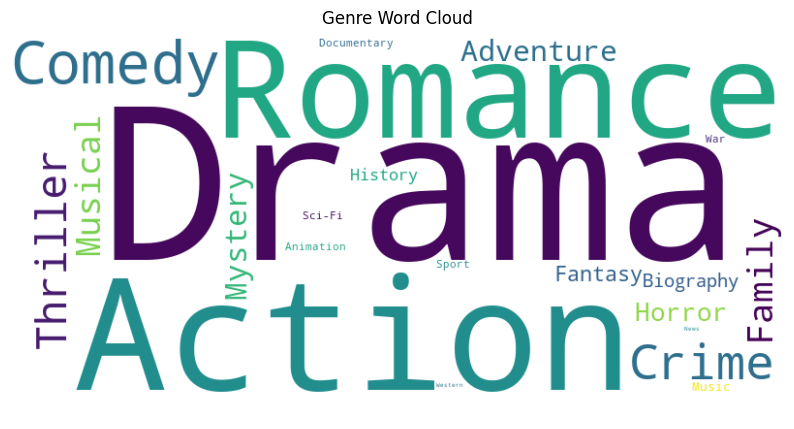

In [146]:
genre_counts = df1['Genre'].str.split(', ', expand=True).stack().value_counts()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)

mpl.figure(figsize=(10, 6))
mpl.imshow(wordcloud, interpolation='bilinear')
mpl.axis('off')
mpl.title('Genre Word Cloud')
mpl.show()

In [147]:
genrePie.loc[genrePie['Count'] < 50, 'Genre'] = 'Other'
ax = px.pie(genrePie, values='Count', names='Genre', title='More than one Genre of movies in Indian Cinema')
ax.show()

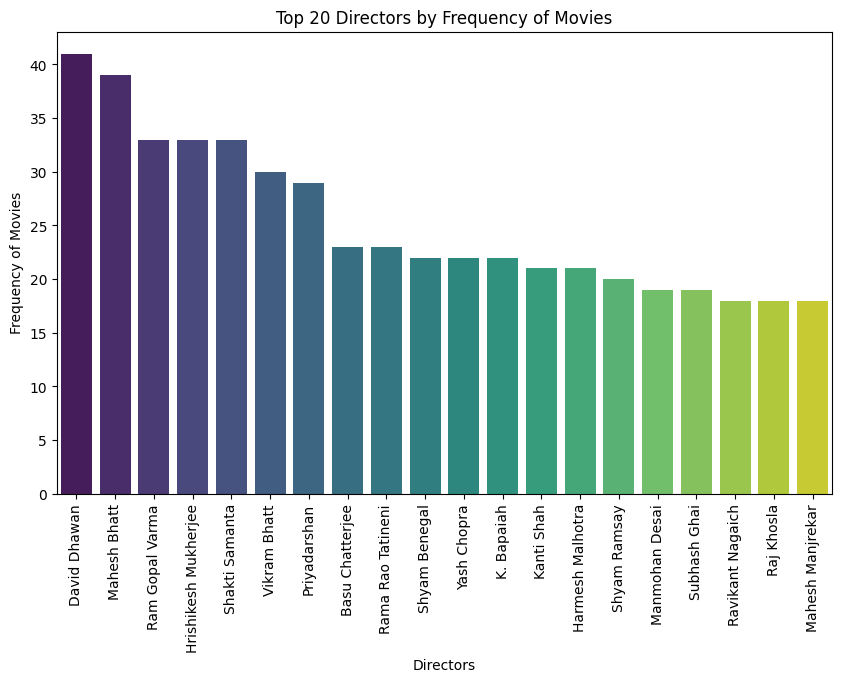

In [148]:
mpl.figure(figsize=(10, 6))
ax = sb.barplot(x=directors.head(20).index, y=directors.head(20).values, palette='viridis')
ax.set_xlabel('Directors')
ax.set_ylabel('Frequency of Movies')
ax.set_title('Top 20 Directors by Frequency of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
mpl.show()

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score as score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [150]:
Input = df1.drop(['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Actor'], axis=1)
Output = df1['Rating']

In [151]:
def evaluate_model(y_true, y_pred, model_name):
    print("Model: ", model_name)
    print("Accuracy = {:0.2f}%".format(score(y_true, y_pred)*100))
    print("Mean Squared Error = {:0.2f}\n".format(mean_squared_error(y_true, y_pred, squared=False)))
    return round(score(y_true, y_pred)*100, 2)

In [152]:
features = df1[['Year', 'Duration', 'Votes', 'Directors', 'Genres', 'Actors']]
target = df1['Rating']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=39)
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.6256678117438041
R-squared: 0.09470668891616008


In [153]:
features = df1[['Year', 'Duration', 'Votes', 'Directors', 'Genres', 'Actors']]

target = df1['Rating']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=39)


model_dt = DecisionTreeRegressor()


model_dt.fit(X_train, y_train)


y_pred = model_dt.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.214234939759036
R-squared: -0.23305146700406443


In [154]:

features = df1[['Year', 'Duration', 'Votes', 'Directors', 'Genres', 'Actors']]

target = df1['Rating']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=39)

model_rf = RandomForestRegressor()


model_rf.fit(X_train, y_train)


y_pred = model_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.138598270481928
R-squared: 0.36594340440729545


In [155]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()


model_xgb.fit(X_train, y_train)


y_pred = model_xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.1649170223305552
R-squared: 0.3512871567824625


In [156]:
from sklearn.ensemble import GradientBoostingRegressor


model_gb = GradientBoostingRegressor()


model_gb.fit(X_train, y_train)


y_pred = model_gb.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.0777327209656111
R-squared: 0.39983789038685025


In [157]:
from lightgbm import LGBMRegressor


model_lgbm = LGBMRegressor()


model_lgbm.fit(X_train, y_train)


y_pred = model_lgbm.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1181
[LightGBM] [Info] Number of data points in the train set: 3872, number of used features: 6
[LightGBM] [Info] Start training from score 5.903771
Mean Squared Error: 1.0679114936516478
R-squared: 0.4053070836191549


In [158]:
from catboost import CatBoostRegressor


model_cb = CatBoostRegressor()
model_cb.fit(X_train, y_train)

y_pred = model_cb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Learning rate set to 0.050708
0:	learn: 1.3416410	total: 4.11ms	remaining: 4.1s
1:	learn: 1.3269464	total: 6.43ms	remaining: 3.21s
2:	learn: 1.3134516	total: 11.2ms	remaining: 3.71s
3:	learn: 1.3022543	total: 13.6ms	remaining: 3.39s
4:	learn: 1.2901548	total: 15.6ms	remaining: 3.1s
5:	learn: 1.2805250	total: 17.4ms	remaining: 2.89s
6:	learn: 1.2708857	total: 20.2ms	remaining: 2.87s
7:	learn: 1.2622350	total: 23.6ms	remaining: 2.93s
8:	learn: 1.2530348	total: 25.6ms	remaining: 2.81s
9:	learn: 1.2446151	total: 27.3ms	remaining: 2.7s
10:	learn: 1.2361947	total: 29.1ms	remaining: 2.61s
11:	learn: 1.2291300	total: 31ms	remaining: 2.55s
12:	learn: 1.2234283	total: 32.8ms	remaining: 2.49s
13:	learn: 1.2168208	total: 36ms	remaining: 2.53s
14:	learn: 1.2112451	total: 37.8ms	remaining: 2.48s
15:	learn: 1.2051625	total: 40.7ms	remaining: 2.5s
16:	learn: 1.1985473	total: 42.5ms	remaining: 2.46s
17:	learn: 1.1931433	total: 44.4ms	remaining: 2.42s
18:	learn: 1.1892011	total: 46.3ms	remaining: 2.39s


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1181
[LightGBM] [Info] Number of data points in the train set: 3872, number of used features: 6
[LightGBM] [Info] Start training from score 5.903771
Learning rate set to 0.050708
0:	learn: 1.3416410	total: 1.97ms	remaining: 1.97s
1:	learn: 1.3269464	total: 3.77ms	remaining: 1.88s
2:	learn: 1.3134516	total: 5.4ms	remaining: 1.79s
3:	learn: 1.3022543	total: 7.07ms	remaining: 1.76s
4:	learn: 1.2901548	total: 8.71ms	remaining: 1.73s
5:	learn: 1.2805250	total: 11.5ms	remaining: 1.9s
6:	learn: 1.2708857	total: 13.7ms	remaining: 1.94s
7:	learn: 1.2622350	total: 15.5ms	remaining: 1.93s
8:	learn: 1.2530348	total: 17.1ms	remaining: 1.89s
9:	learn: 1.2446151	total: 18.8ms	remaining: 1.86s
10:	learn: 1.2361947	total: 20.4ms	remaining: 1.83s
11:	learn: 1.2291300	total: 22ms	remaining: 1.81s
12:	learn: 1.2234283

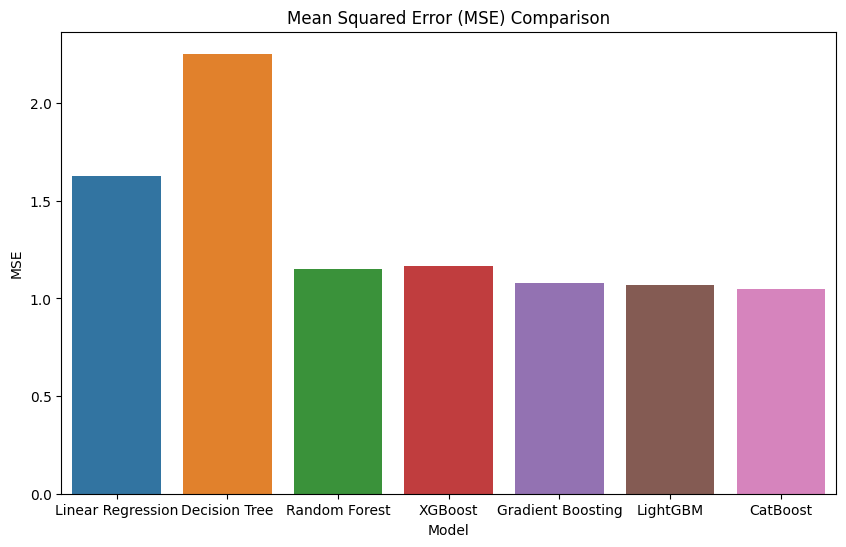

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


features = df1[['Year', 'Duration', 'Votes', 'Directors', 'Genres', 'Actors']]


target = df1['Rating']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=39)


models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'LightGBM': LGBMRegressor(),
    'CatBoost': CatBoostRegressor()
}


results = {'Model': [], 'MSE': [], 'R-squared': []}
predictions = {}

for model_name, model in models.items():

    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred


    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    results['Model'].append(model_name)
    results['MSE'].append(mse)
    results['R-squared'].append(r2)


results_df = pd.DataFrame(results)


plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=results_df)
plt.title('Mean Squared Error (MSE) Comparison')
plt.show()


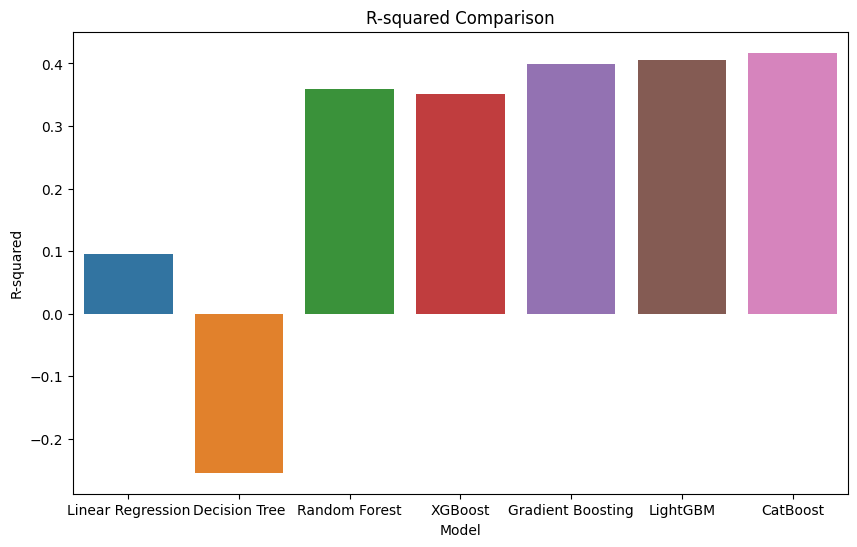

In [160]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R-squared', data=results_df)
plt.title('R-squared Comparison')
plt.show()

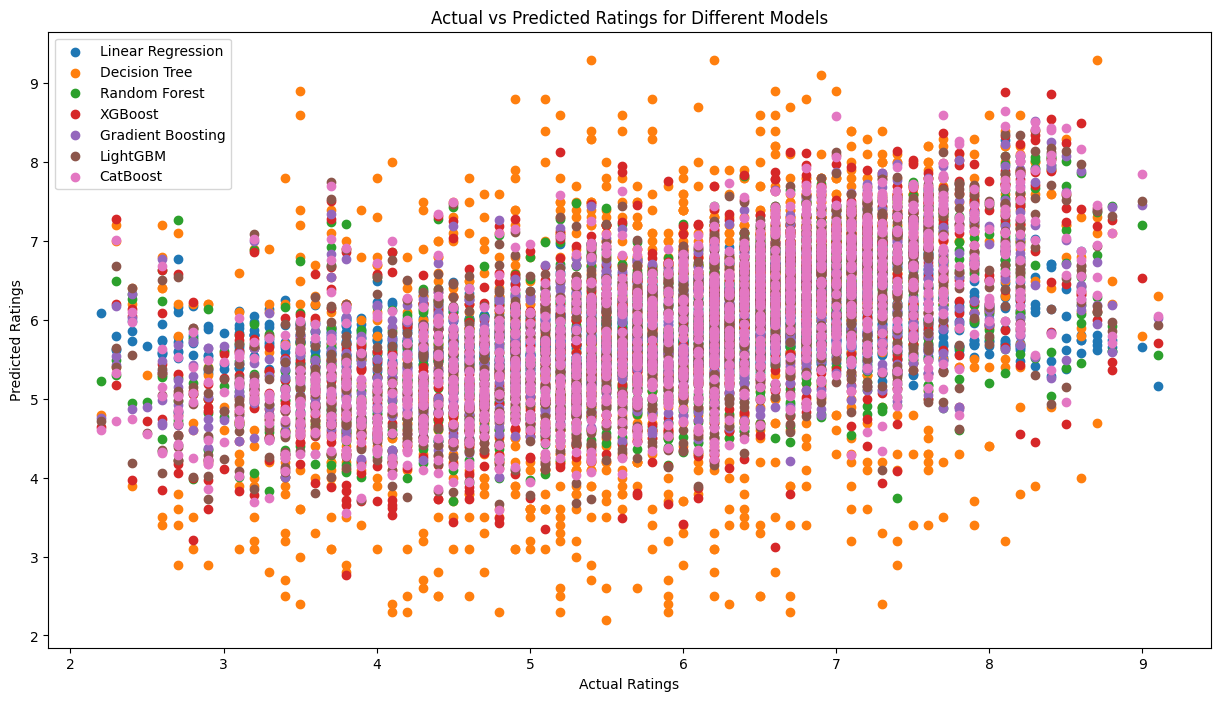

In [161]:
plt.figure(figsize=(15, 8))
for model_name, y_pred in predictions.items():
    plt.scatter(y_test, y_pred, label=model_name)

plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings for Different Models')
plt.legend()
plt.show()

In [162]:
print(results_df)

               Model       MSE  R-squared
0  Linear Regression  1.625668   0.094707
1      Decision Tree  2.252675  -0.254458
2      Random Forest  1.150225   0.359469
3            XGBoost  1.164917   0.351287
4  Gradient Boosting  1.077701   0.399856
5           LightGBM  1.067911   0.405307
6           CatBoost  1.046519   0.417220
